In [45]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit #time to process
import requests
import time
from scipy.stats import linregress
from datetime import datetime

from config import weather_api_key
from citipy import citipy # Use the citipy module to determine city based on latitude and longitude.

In [46]:
requests.__version__
#https://requests.kennethreitz.org/en/master/


'2.24.0'

In [47]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
latitudes

[-26.46519552347563,
 -52.12323107214977,
 65.3266919650409,
 -85.40667358072527,
 80.60366198325542,
 -38.43513471922765,
 -28.321531252970274,
 4.250225361669543,
 -89.18804906048597,
 0.541899158717585]

In [48]:
#can not generate whole numbers
random.uniform(-90, 90)

74.5131442748987

In [49]:
# only generate whole numbers
# step is used to seperate the random numbers by a minimum amount
random.randrange(-90, 90, step=3)

-33

In [50]:
#random whole numbers from with in a given range
random.randrange(-90, 90, step=1)

55

In [51]:
#random whole numbers from with in a given range
random.randint(-90,90)

7

In [52]:
# generate and array of x (size) amount of numbers
np.random.uniform(-90.000, 90.000, size=50)

array([ 15.80100874,  -1.06267132, -50.77200858,  25.76902446,
        17.5631163 , -80.41949277, -56.96622568,  68.26856548,
       -68.3246313 ,  -3.83325023, -80.73736201,  -7.078402  ,
         3.95594468,  54.20117084,  55.84573072,  41.94120372,
        34.23430621,  30.13282714,  54.46256589, -23.03951316,
        46.4337009 , -20.75308131,  59.30845884, -15.25714534,
        59.63403507, -27.28024437, -28.80127933,  38.74662286,
       -77.91344425,  73.89765587,   0.20296821, -66.69217586,
         0.19205806, -65.48348992, -37.32134081,  86.92170763,
        41.40529218, -12.06942776,  58.81994012,   5.97392931,
        34.21442327, -19.4831792 ,   6.1769649 , -80.02951203,
        74.85692159, -38.94355826,  31.25176309, -22.72654536,
       -56.98685248,  -9.02019939])

In [53]:
# time to process line
%timeit np.random.uniform(-90.000, 90.000, size=1500)

14.7 µs ± 466 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
# For loop take 60 times longer than the np.random.uniform()
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.57 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Generate Random Lat Long

In [55]:
# Create a set of random latitude and longitude combinations.
# zip creates pairs in the order listed
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#### Example --how to show contents of zip-- DO NOT DO THIS WITH 1500
#### You can only unzip a zipped tuple once before it is removed from the
#### computer's memory. Make sure you unzip the latitudes and longitudes 
#### into the coordinates list before moving on.

In [56]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [57]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [58]:
coordinates[25]

(55.3000014082248, 27.291772866886674)

# Generate Random World Cities
##### Example for iterating through lat long  and finding city

In [59]:
# Use the tuple() function to display the latitude and longitude combinations.
# It works...commenting out to save memory
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [60]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

# Using API
### Open Weather map API
### import requests 
##### https://requests.kennethreitz.org/en/master/

### Building API URL

In [61]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
# api.openweathermap.org/data/2.5/weather?q={city name},{state code},{country code}&appid={API key}
# api.openweathermap.org/data/2.5/weather?q={city name},{state code}&appid={API key}


In [62]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72c6ac49835b8273bfc5a12e4f65f701


### Add query to url

In [63]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72c6ac49835b8273bfc5a12e4f65f701&q=Boston


## Request()
### Request Method	    Action
### get()--------------------->Retrieves data from a web source.
### head()--------------------->Retrieves the headers from a web source.
### post()--------------------->Adds or annotates data on a web source. Used on mailing groups, message boards, or comments.
### put()--------------------->Updates an existing resource. For example, if the date on a Wikipedia page is wrong, you can use the put() method to update that date.
### delete()--------------------->Deletes data from a web source.
### options()--------------------->Discovers what HTTP methods a web source allows.
### patch()--------------------->Partially modifies a web source.


### 
### 
### Build a get request

In [64]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [65]:
#boston spelled wrong so it could not find that name in the query
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [66]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72c6ac49835b8273bfc5a12e4f65f701&q=Bston'

In [67]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

### Get the data/text from the 'Get' request.
#### Output is a dictionary

In [68]:
# Get the text of the 'Get' request. Output is a dictionary
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":64.04,"feels_like":64.42,"temp_min":60.15,"temp_max":67.84,"pressure":1011,"humidity":91},"visibility":10000,"wind":{"speed":3,"deg":301,"gust":8.01},"clouds":{"all":40},"dt":1622864398,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1622797730,"sunset":1622852203},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

### Use json to access the data returned from get request
### Makes it a lot easier to read

In [69]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 64.04,
  'feels_like': 64.42,
  'temp_min': 60.15,
  'temp_max': 67.84,
  'pressure': 1011,
  'humidity': 91},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 301, 'gust': 8.01},
 'clouds': {'all': 40},
 'dt': 1622864398,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622797730,
  'sunset': 1622852203},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### Error handling for request respnse code (200, 404 etc)
### Use .status_code on the variable containing the response

In [70]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bton"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [71]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


# PARSE RESPONSE from Get request

### Get the json data

In [72]:
# Get the JSON data.
boston_data = city_weather.json()

### Review data

In [73]:
# Review data in table
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 64.04,
  'feels_like': 64.42,
  'temp_min': 60.15,
  'temp_max': 67.84,
  'pressure': 1011,
  'humidity': 91},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 301, 'gust': 8.01},
 'clouds': {'all': 40},
 'dt': 1622864398,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622797730,
  'sunset': 1622852203},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### Pull data from dictionary

In [74]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1622797730,
 'sunset': 1622852203}

### Pull data from dictionary 2 levels deep

In [75]:
boston_data["sys"]["country"]

'US'

In [76]:
# date time 
boston_data['dt']

1622864398

In [77]:
# latitude
boston_data["coord"]["lat"]

42.3584

### Place all relevent data into variables

In [78]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 67.84 91 40 3


## Convert Date Time Stamp from unix time
### from datetime import datetime
#### https://docs.python.org/3.6/library/datetime.html#strftime-and-strptime-behavior
#### https://docs.python.org/3.6/library/datetime.html
#### Date time listed in a comma delimited fashion

In [79]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 6, 5, 3, 39, 58)

In [80]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date string formatted
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-05 03:39:58'

### Import Dependencies, and Initialize an Empty List and Counters

In [81]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Basic Loop Through the List of Cities and Build the City URL

In [82]:
# Loop through all the cities in our list.
#for i in range(len(cities)):
#
#
#    # Group cities in sets of 50 for logging purposes.
#   if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

## enumerate() 
### Loop Through the List of Cities and Build the City URL
### it works just not complex enough for what we need


In [83]:
# Loop through all the cities in the list.
## Change to code to run

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): #is remainder of 50 >= 0... basically checks if there is a remainder. if so contiue counting until there isn't
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") # replace all spaces in city with "+"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | westport
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | ban nahin
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | grenada
Processing Record 16 of Set 1 | bolungarvik
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | north platte
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | rudbar
Processing Record 23 of Set 1 | mar del plata
Processing Record 24 of Set 1 | braslav
Proce

Processing Record 9 of Set 10 | manado
Processing Record 10 of Set 10 | altay
Processing Record 11 of Set 10 | volchansk
Processing Record 12 of Set 10 | karratha
Processing Record 13 of Set 10 | marcona
Processing Record 14 of Set 10 | taburao
Processing Record 15 of Set 10 | cabra
Processing Record 16 of Set 10 | vaitupu
Processing Record 17 of Set 10 | itarema
Processing Record 18 of Set 10 | guerrero negro
Processing Record 19 of Set 10 | shishou
Processing Record 20 of Set 10 | yabrud
Processing Record 21 of Set 10 | olafsvik
Processing Record 22 of Set 10 | wahran
Processing Record 23 of Set 10 | carupano
Processing Record 24 of Set 10 | sokolka
Processing Record 25 of Set 10 | tabiauea
Processing Record 26 of Set 10 | constitucion
Processing Record 27 of Set 10 | banjar
Processing Record 28 of Set 10 | shu
Processing Record 29 of Set 10 | omsukchan
Processing Record 30 of Set 10 | phangnga
Processing Record 31 of Set 10 | hamilton
Processing Record 32 of Set 10 | la rioja
Proces

# Handle API Request Errors with try-except Blocks
### Exception handling

In [84]:
# Loop through all the cities in the list.
## change to code to run
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): #is remainder of 50 >= 0... basically checks if there is a remainder. if so contiue counting until there isn't
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") # replace all spaces in city with "+"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    ###################################################################
    #   Start your exception here...when it adds to the iterator      #
    #   to go to the next record                                      #
    ###################################################################
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 43 of Set 12 | cape town
Processing Record 44 of Set 12 | atuona
Processing Record 45 of Set 12 | westport
Processing Record 46 of Set 12 | castro
Processing Record 47 of Set 12 | punta arenas
Processing Record 48 of Set 12 | bambous virieux
Processing Record 49 of Set 12 | brae
Processing Record 50 of Set 12 | saskylakh
Processing Record 51 of Set 12 | bengkulu
Processing Record 52 of Set 12 | hilo
Processing Record 53 of Set 12 | ban nahin
Processing Record 54 of Set 12 | busselton
Processing Record 55 of Set 12 | hermanus
Processing Record 56 of Set 12 | provideniya
Processing Record 57 of Set 12 | grenada
Processing Record 58 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 59 of Set 12 | butaritari
Processing Record 60 of Set 12 | upernavik
Processing Record 61 of Set 12 | bredasdorp
Processing Record 62 of Set 12 | north platte
Processing Record 63 of Set 12 | mahebourg
Processing Record 64 of Set 12 | rudbar
Processing Record 65 of Set 12 |

Processing Record 34 of Set 15 | boende
Processing Record 35 of Set 15 | neuquen
Processing Record 36 of Set 15 | skjervoy
Processing Record 37 of Set 15 | bilibino
Processing Record 38 of Set 15 | souillac
Processing Record 39 of Set 15 | ribeira grande
Processing Record 40 of Set 15 | saint-augustin
Processing Record 41 of Set 15 | uttaradit
Processing Record 42 of Set 15 | plettenberg bay
Processing Record 43 of Set 15 | bathsheba
Processing Record 44 of Set 15 | san cristobal
Processing Record 45 of Set 15 | esperance
Processing Record 46 of Set 15 | puri
Processing Record 47 of Set 15 | roebourne
Processing Record 48 of Set 15 | thompson
Processing Record 49 of Set 15 | ahipara
Processing Record 50 of Set 15 | anadyr
Processing Record 1 of Set 16 | pacific grove
Processing Record 2 of Set 16 | nikolskoye
Processing Record 3 of Set 16 | karkaralinsk
City not found. Skipping...
Processing Record 4 of Set 16 | cherskiy
Processing Record 5 of Set 16 | oranjemund
Processing Record 6 of

Processing Record 19 of Set 19 | hainichen
Processing Record 20 of Set 19 | otofuke
Processing Record 21 of Set 19 | cam ranh
Processing Record 22 of Set 19 | mtambile
Processing Record 23 of Set 19 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 19 | rio gallegos
Processing Record 25 of Set 19 | hualmay
Processing Record 26 of Set 19 | carballo
Processing Record 27 of Set 19 | feldkirchen
Processing Record 28 of Set 19 | charagua
Processing Record 29 of Set 19 | tessalit
Processing Record 30 of Set 19 | hunza
City not found. Skipping...
Processing Record 31 of Set 19 | sitka
Processing Record 32 of Set 19 | tiksi
Processing Record 33 of Set 19 | rawson
Processing Record 34 of Set 19 | gewane
Processing Record 35 of Set 19 | sao jose da coroa grande
Processing Record 36 of Set 19 | lundazi
Processing Record 37 of Set 19 | el alto
Processing Record 38 of Set 19 | columbia
Processing Record 39 of Set 19 | isoka
Processing Record 40 of Set 19 | big spring
Processing Reco

Processing Record 5 of Set 23 | vanersborg
Processing Record 6 of Set 23 | filadelfia
Processing Record 7 of Set 23 | hobyo
Processing Record 8 of Set 23 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 23 | fort nelson
Processing Record 10 of Set 23 | stephenville
Processing Record 11 of Set 23 | voh
Processing Record 12 of Set 23 | jinchengjiang
City not found. Skipping...
Processing Record 13 of Set 23 | sorkjosen
Processing Record 14 of Set 23 | san clemente
Processing Record 15 of Set 23 | pemangkat
Processing Record 16 of Set 23 | watertown
Processing Record 17 of Set 23 | olinda
Processing Record 18 of Set 23 | kinshasa
Processing Record 19 of Set 23 | piopio
Processing Record 20 of Set 23 | pahrump
Processing Record 21 of Set 23 | husavik
Processing Record 22 of Set 23 | bubaque
Processing Record 23 of Set 23 | baherden
Processing Record 24 of Set 23 | bayan
Processing Record 25 of Set 23 | canico
Processing Record 26 of Set 23 | olga
Processing Record 27 of

In [85]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,52.12,97,0,3.29,ZA,2021-06-05 03:40:00
1,Atuona,-9.8000,-139.0333,79.41,80,35,19.42,PF,2021-06-05 03:42:35
2,Westport,41.1415,-73.3579,67.33,95,1,1.01,US,2021-06-05 03:42:35
3,Castro,-24.7911,-50.0119,55.94,90,0,4.14,BR,2021-06-05 03:42:35
4,Punta Arenas,-53.1500,-70.9167,30.31,100,40,5.84,CL,2021-06-05 03:42:36
5,Bambous Virieux,-20.3428,57.7575,74.21,88,75,18.32,MU,2021-06-05 03:42:36
6,Brae,60.3964,-1.3530,48.11,81,83,5.19,GB,2021-06-05 03:42:36
7,Saskylakh,71.9167,114.0833,38.86,70,90,10.25,RU,2021-06-05 03:42:36
8,Bengkulu,-3.8004,102.2655,76.24,92,100,8.52,ID,2021-06-05 03:42:37
9,Hilo,19.7297,-155.0900,78.53,72,20,13.80,US,2021-06-05 03:37:58


### Reorder columns

In [86]:
new_column_order= ["City","Country","Date",'Lat','Lng','Max Temp', 'Humidity','Cloudiness', 'Wind Speed']

In [87]:
city_data_df = city_data_df[new_column_order]

In [88]:
city_data_df.head(1)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-06-05 03:40:00,-33.9258,18.4232,52.12,97,0,3.29


# Convert Dataframe to CSV

In [89]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [90]:
output_data_file2 = "weather_data/cities.csv"

# Create Plot
## Gather Plotting data

In [91]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Get today's date

In [92]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622866176.9298003

In [94]:
today = time.strftime("%x")
today

'06/05/21'

### Latitude vs max temp

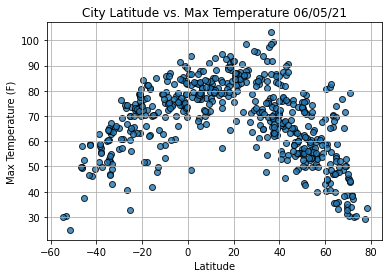

In [95]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Latitude vs Humidity

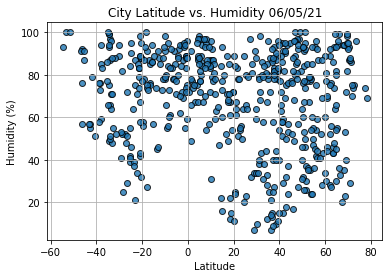

In [96]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Latitude vs Humidity

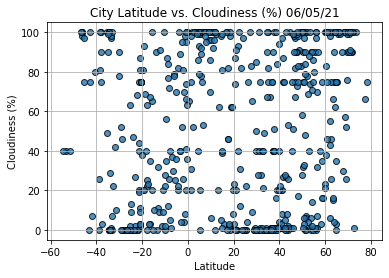

In [98]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Latitude vs Wind Speed

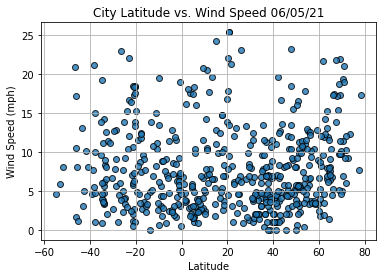

In [99]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression
### Fitting a line using data from scatter plot
### Try on all new datasets
#### y = mx + b (y-depedent variable (dependent on x), m-slope,x-independent variable,y-intercept)
#### use linregress method() ... linregress(independent variable(x), dependent variable(y))
#### scipy.stats import lingress
#### import matplotlib.pyplot as plt
#### in linregress the higher the standard error the less the model describes the data sufficiently
#### (slope, intercept, rval, pval, stderr) = linregress(independent(x),dependent(y))
#### calculate the line....line equals... line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [100]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [101]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

## x,y... which variable data set does not depend on the other...thats X

In [102]:
linregress(lats,temps) 

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935)

## Perform linear regression. 
### Adds data to each variable

In [103]:
# Perform linear regression. 
# Adds data to each variable
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

## Get the equation of the line.

In [104]:
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


y = -0.45x + 92.94


In [105]:
print(f"The p-value is: {p_value:.3f}")

The p-value is: 0.011


# AVOID ERROR
##### The slope, intercept, r_value, p_value, and std_errare always returned when we run the 
##### linregress function. If you don't want to calculate one of these values but do not add 
##### it inside the parentheses, you'll get a ValueError: too many values to unpack.

##### To prevent this error, add a comma and underscore for each value you don't want to calculate.

##### For instance, if you don't want to print out the p-value and the standard error, 
##### write your function as (slope, intercept, r_value, _, _) = linregress(x, y).

# Understanding p-value and significance of your data
##### In statistics, the p-value is used to determine significance of results. In most cases,
##### data scientists like to use a significance level of 0.05, which means:

### A linear regression with a p-value > 0.05 is not statistically significant.

### A linear regression with a p-value < 0.05 is statistically significant.

##### P-values can also be used to justify rejecting a null hypothesis. We will discuss
##### p-values and hypothesis testing in more detail later in the course.

# Perform list comprehension 
### on the latitudes by multiplying each latitude by the slope and adding the intercept
## Calculate the regression line "y values" from the slope and intercept.

In [107]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

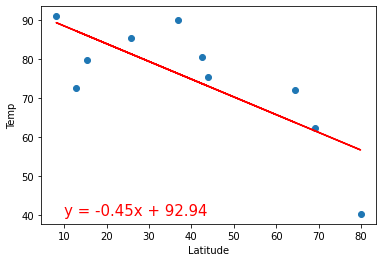

In [109]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

## Let's review what ^this code^ does:

### We plot the latitudes and temperatures on a scatter plot.
### We create a line plot of our regression line with the ideal temperatures.
### We annotate the line plot by adding the equation of our regression line, where the x-axis is 10 and the y-axis is 40, and specify the font and color.
### We create x- and y-axes labels.